<a href="https://colab.research.google.com/github/olinyoder2534/TensorflowPractice/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

In [7]:
data = pd.read_csv('/CustomerChurn.csv')

Data Exploration

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.shape

(7043, 21)

In [10]:
data.isna().sum().sum()

0

In [11]:
data.replace('', pd.NA, inplace=True)
data.replace(' ', pd.NA, inplace=True)
blank_values = data.isna().sum()
print(blank_values)
#11 TotalCharges are blank

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [12]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
print('Number of Churn options in data set: {}'.format(data['Churn'].nunique()))
print('Number of No: {}'.format(data[data['Churn'] == 'No'].shape[0]))
print('Number of Yes: {}'.format(data[data['Churn'] == 'Yes'].shape[0]))
#unbalanced data, consider rebalancing

Number of Churn options in data set: 2
Number of No: 5174
Number of Yes: 1869


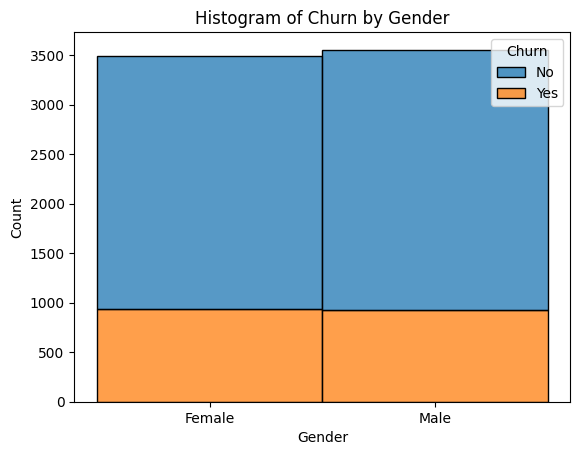

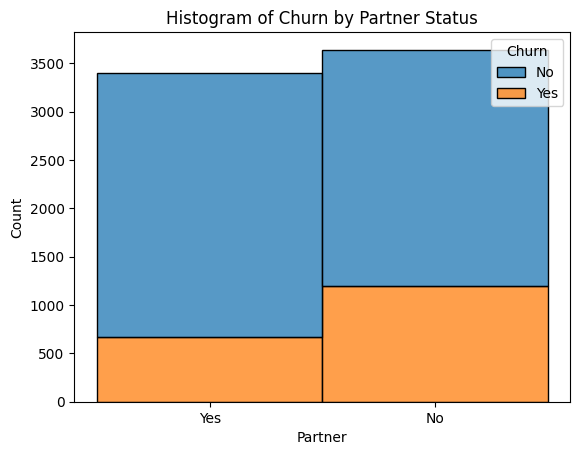

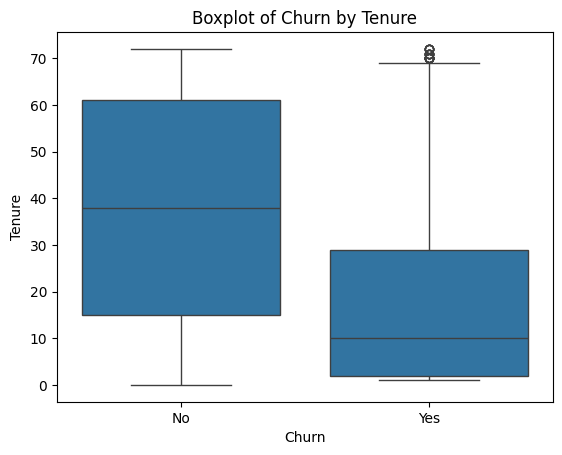

In [14]:
#change variables based on need
sns.histplot(data=data, x='gender', hue='Churn', multiple='stack')
plt.title('Histogram of Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

sns.histplot(data=data, x='Partner', hue='Churn', multiple='stack')
plt.title('Histogram of Churn by Partner Status')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

sns.boxplot(data=data, x='Churn', y='tenure')
plt.title('Boxplot of Churn by Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

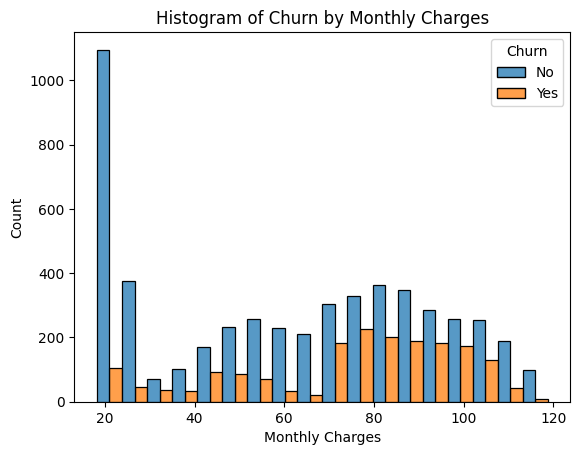

In [15]:
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', multiple='dodge')
plt.title('Histogram of Churn by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

Data Cleaning

In [16]:
#drop ID column
data.drop('customerID', axis = 'columns', inplace = True)

In [17]:
data.shape

(7043, 20)

In [18]:
#convert total charges variable to numeric
#data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data.iloc[488]
  #Check blank TotalCharges

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                             <NA>
Churn                                      No
Name: 488, dtype: object

In [19]:
data.reset_index(drop=True, inplace=True)
blank_rows = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
data2 = data.drop(index=blank_rows, axis=0)
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
data2.replace('', pd.NA, inplace=True)
data2.replace(' ', pd.NA, inplace=True)
blank_values2 = data2.isna().sum()
print(blank_values2)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [21]:
#linear regression model using L1 regularization. Will be used to impute the missing TotalCharges value
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = data2.drop(columns=['TotalCharges'])
y = data2['TotalCharges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

numerical_columns = ['tenure', 'MonthlyCharges']
categorical_columns = [col for col in data.columns if col not in numerical_columns]
categorical_columns.remove('TotalCharges')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

lasso_model = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.1))
])

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'Churn'])])),
                ('lasso', Lasso(alpha=0.1))])

In [22]:
blank_rows = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
data3 = data.iloc[blank_rows]

In [23]:
#data.iloc[1340]
data3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,<NA>,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,<NA>,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,<NA>,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,<NA>,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,<NA>,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,<NA>,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,<NA>,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,<NA>,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,<NA>,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,<NA>,No


In [24]:
TotalChargesImputed = lasso_model.predict(data3)
TotalChargesImputed
#some values are negative which does not make any sense

array([    9.18579532, -1250.91275536,  1297.74610256,  -960.74999898,
         410.35643335, -1241.56158942,  -974.17250441, -1255.70663392,
       -1062.37258539,  1007.49353286,   287.50196381])

In [25]:
data2.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [26]:
#data2['TotalCharges'].min()

#sns.boxplot(data=data2, y='TotalCharges')
#plt.title('Total Charges')
#plt.ylabel('TotalCharges')
#plt.yticks(range(0, int(data2['TotalCharges'].max()) + 100, 100))
#plt.show()

In [27]:
y_train.head()
y_train = pd.to_numeric(y_train)

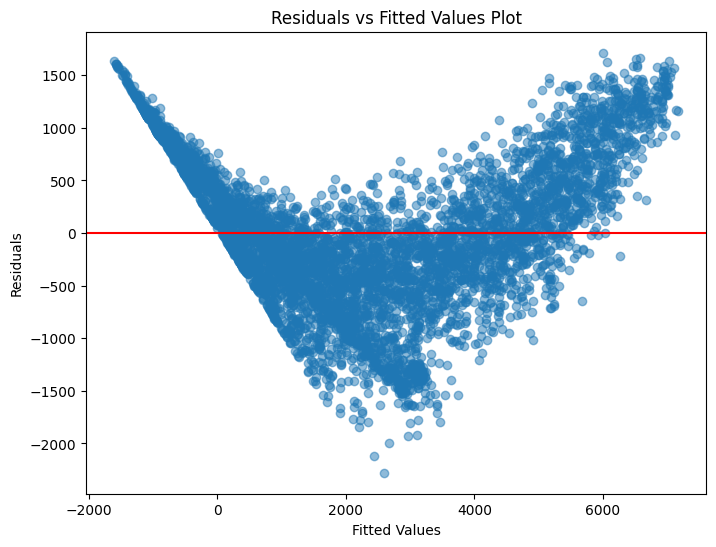

In [28]:
predicted_values = lasso_model.predict(X_train)

residuals = y_train - predicted_values

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()
#data is obviously not linear, so a linear regression model is not gonna work

In [29]:
#predictions shouldnt be negative
data2['TotalCharges'] = pd.to_numeric(data2['TotalCharges'], errors='coerce')

min_charge = data2['TotalCharges'].min()
max_charge = data2['TotalCharges'].max()
charge_range = max_charge - min_charge

print('Min: {}'.format(min_charge))
print('Max: {}'.format(max_charge))
print('Range: {}'.format(charge_range))

CountSmallTotalCharges = 0
for charge in data2['TotalCharges']:
    if charge < 50:
        CountSmallTotalCharges += 1

print("Number of Total Charges under $50: {}".format(CountSmallTotalCharges))

Min: 18.8
Max: 8684.8
Range: 8666.0
Number of Total Charges under $50: 365


In [30]:
print(data2.shape)
print(data.shape)

(7032, 20)
(7043, 20)


In [31]:
#use a rf instead
from sklearn.ensemble import RandomForestRegressor

random_forest_model = Pipeline([
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))
])

random_forest_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'Churn'])])),
                ('random_forest', RandomForestRegressor(random_state=42))])

In [32]:
TotalChargesImputedRf = random_forest_model.predict(data3)
TotalChargesImputedRf

array([52.8095, 20.2505, 81.0395, 25.699 , 56.039 , 19.8485, 25.34  ,
       19.996 , 19.694 , 73.1425, 61.5275])

In [33]:
print(TotalChargesImputedRf.shape)
print(data['TotalCharges'].isna().sum())

(11,)
11


In [34]:
Tcirf_series = pd.Series(TotalChargesImputedRf, index=data.index[data['TotalCharges'].isna()])
data['TotalCharges'].fillna(pd.Series(Tcirf_series), inplace=True)

In [35]:
data.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                          52.8095
Churn                                      No
Name: 488, dtype: object

In [36]:
print(data['TotalCharges'].isna().sum())

0


In [37]:
data.dtypes
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [38]:
data2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [39]:
for col in data:
  print('{}: {}'.format(col, data[col].unique()))

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [40]:
#replace "no internet service" & "no phone service" with "no"
data.replace('No internet service', 'No', inplace = True)
data.replace('No phone service', 'No', inplace = True)

In [41]:
for col in data:
  print('{}: {}'.format(col, data[col].unique()))

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [42]:
#convert yes = 1, no = 0
yn = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yn:
    data[col].replace({'Yes': 1,'No': 0},inplace=True)

#convert female = 1, male = 0
data['gender'].replace({'Female':1,'Male':0},inplace=True)

In [43]:
#dummy encode
newdata = pd.get_dummies(data=data, columns=['InternetService','Contract','PaymentMethod'])
newdata.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [44]:
#scale data
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
newdata[cols_to_scale] = scaler.fit_transform(newdata[cols_to_scale])

Modeling to Predict Churn

# ANN

In [45]:
X1 = newdata.drop('Churn',axis='columns')
y1 = newdata['Churn']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=5)

In [46]:
len(X1_train.columns)

26

In [ ]:
from tensorflow import keras

class PrintEveryFifthEpoch(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 5 == 0:
            print("Epoch {} - Loss: {:.4f}, Accuracy: {:.4f}".format(epoch + 1, logs['loss'], logs['accuracy']))

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X1_train, y1_train, epochs=100)

In [48]:
model.evaluate(X1_test, y1_test)

45/45 [==============================] - 0s 3ms/step - loss: 0.4606 - accuracy: 0.7864


[0.46056658029556274, 0.7863733172416687]

In [49]:
def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)
    tp = tf.reduce_sum(y_true * y_pred)
    fp = tf.reduce_sum((1 - y_true) * y_pred)
    fn = tf.reduce_sum(y_true * (1 - y_pred))

    precision = tp / (tp + fp + keras.backend.epsilon())
    recall = tp / (tp + fn + keras.backend.epsilon())

    f1 = 2 * precision * recall / (precision + recall + keras.backend.epsilon())
    return f1

In [ ]:
#using f1 score since data is unbalanced
model1 = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[f1_score])

model1.fit(X1_train, y1_train, epochs=100)

In [51]:
model1.evaluate(X1_test, y1_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.4759 - f1_score: 0.5529


[0.475931316614151, 0.5529000759124756]

In [52]:
predictions = model.predict(X1_test)

pred_class = []
for i in predictions:
    if i > 0.5:
        pred_class.append(1)
    else:
        pred_class.append(0)

45/45 [==============================] - 0s 2ms/step


Text(95.72222222222221, 0.5, 'Actual')

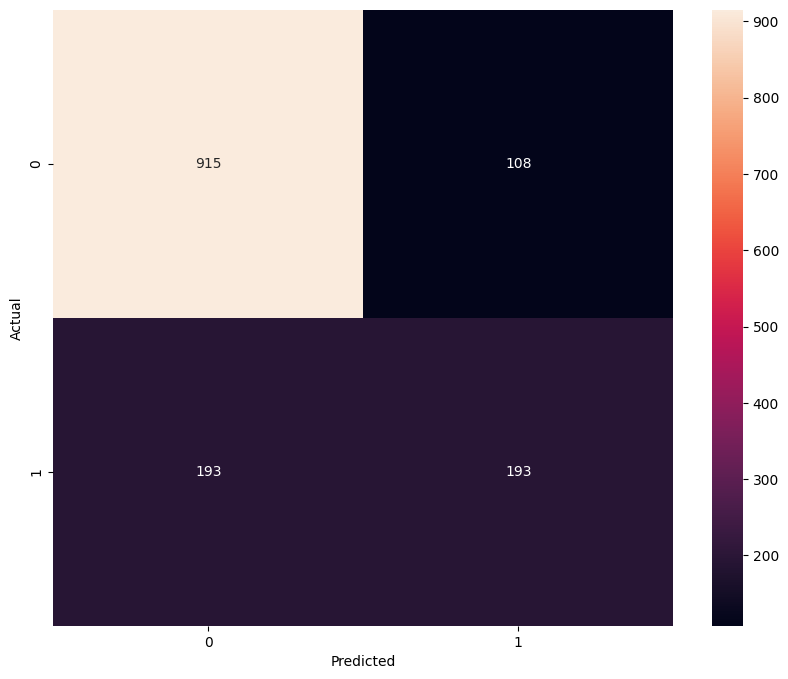

In [53]:
cm = tf.math.confusion_matrix(labels=y1_test,predictions=pred_class)

plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Other Models


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

log_reg_model = Pipeline([
    ('log_reg', LogisticRegression())
])

log_reg_model.fit(X1_train, y1_train)

y1_pred = log_reg_model.predict(X1_test)

accuracy = accuracy_score(y1_test, y1_pred)
f1 = f1_score(y1_test, y1_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7927608232789212
F1 Score: 0.5816618911174786


In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X1_train, y1_train)

y1_pred_rf = rf_model.predict(X1_test)

accuracy_rf = accuracy_score(y1_test, y1_pred_rf)
f1_rf = f1_score(y1_test, y1_pred_rf)

print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - F1 Score:", f1_rf)

Random Forest - Accuracy: 0.7906316536550745
Random Forest - F1 Score: 0.5655375552282769


In [61]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X1_train, y1_train)

y1_pred_svm = svm_model.predict(X1_test)

accuracy_svm = accuracy_score(y1_test, y1_pred_svm)
f1_svm = f1_score(y1_test, y1_pred_svm)

print("Support Vector Machine - Accuracy:", accuracy_svm)
print("Support Vector Machine - F1 Score:", f1_svm)

Support Vector Machine - Accuracy: 0.78708303761533
Support Vector Machine - F1 Score: 0.5508982035928144
